<a href="https://colab.research.google.com/github/robbfo/data_science_certificate/blob/main/assignment1_RF_completed.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Assignment 1 - Classification


## Learning Outcomes


* Data exploration and pre-processing

* Develop a pipeline to carry out classification

* Compare different metrics and classifiers

The objective is to predict whether or not a credit card client will default for their payment in the next month. We will be using the better of 2 classifiers namely, Random Forest and KNN Classifier, and determine the best of a given set of hyperparameters by using grid search.


In [1]:
## Use this for consistency in graphs through out the notebook
import numpy as np
import pandas as pd

# to make this notebook's output stable across runs
np.random.seed(123)

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# Sklearn library
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import FunctionTransformer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.externals import joblib
from sklearn.ensemble import RandomForestClassifier as rfc
from sklearn.neighbors import KNeighborsClassifier as knnc
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split 
from sklearn.metrics import (accuracy_score, balanced_accuracy_score, 
                             confusion_matrix, precision_score, 
                             recall_score)
from sklearn.model_selection import GridSearchCV

/usr/local/lib/python3.7/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


**Questions (12 marks total)**

Q1.  Explore the credit card data set provided. You can also access it from the this link 

https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients
(https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients)

The data is open for public use and no authorizations are required.

You will build a classification model for this default of credit card clients dataset.  The objective is to predict whether or not a credit card client will default for their payment in the next month.

Make sure you perform your analyses and answer the questions in sections below:

1. Data exploration:  ( 3 marks) 

    - Explore the data ( for example look at the data, plot graphs ( histogram, pair plots)
    
2. Data Preprocessing: (4 marks)

    - Make sure you build a full data pipeline ( ie., use the pipeline to apply transformers and estimators- https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html )
    - Do you require any data pre-processing? Are all the features useful? (Use only raw features from this dataset, in other words, no need to create feature crosses or new features)
    - Set the random seed to 123 (For splitting or any other random algorithm)
    - Split data into training (80%) and testing (20%)
    - Use Cross-validation with 5-folds
    - For other parameters, use default

3. Classification: (5 marks)

    - Study the ROC Curve, decide threshold
    - Use 2 classifiers.
    
         a. Random Forest
            - tune only: n_estimators: {4, 5, 10, 20, 50}.  We will be running random forest model using GridSearchCV, determine the best hyperparameter for the given list of n_estimators {4, 5, 10, 20, 50}. n_estimators refers to the number of trees in the forest. We will use CV = 5 and the scoring to be the roc_auc (area under the curve)
          
       b. KNN Classfier 
            - tune only: n_neighbors: {3, 5, 10, 20}. You may perform similar GridSearchCV as in the previous exercise with a given list of n_neightbors. 
        
    - Which one performs better in the cross validation? Note down your observations and give comments.
    
You may refer to the documentation for RandomForests and KNN Classifiers, for the different parameters and options available in the scikit-learn library.
http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html



# Reading data

In [3]:
# Read data into pandas DataFrame object 
# NOTE: the file "default of credit card clients.xls" will need to be in the runtime of the VM
df = pd.read_excel("default of credit card clients.xls", header=1)

# Get summary statistics, looking specifically for nulls
print(df.info())

# Pandas view option to show all columns without restriction
pd.set_option("display.max_columns",100)

# View the top 10 rows of the DataFrame
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

# Data Exploration

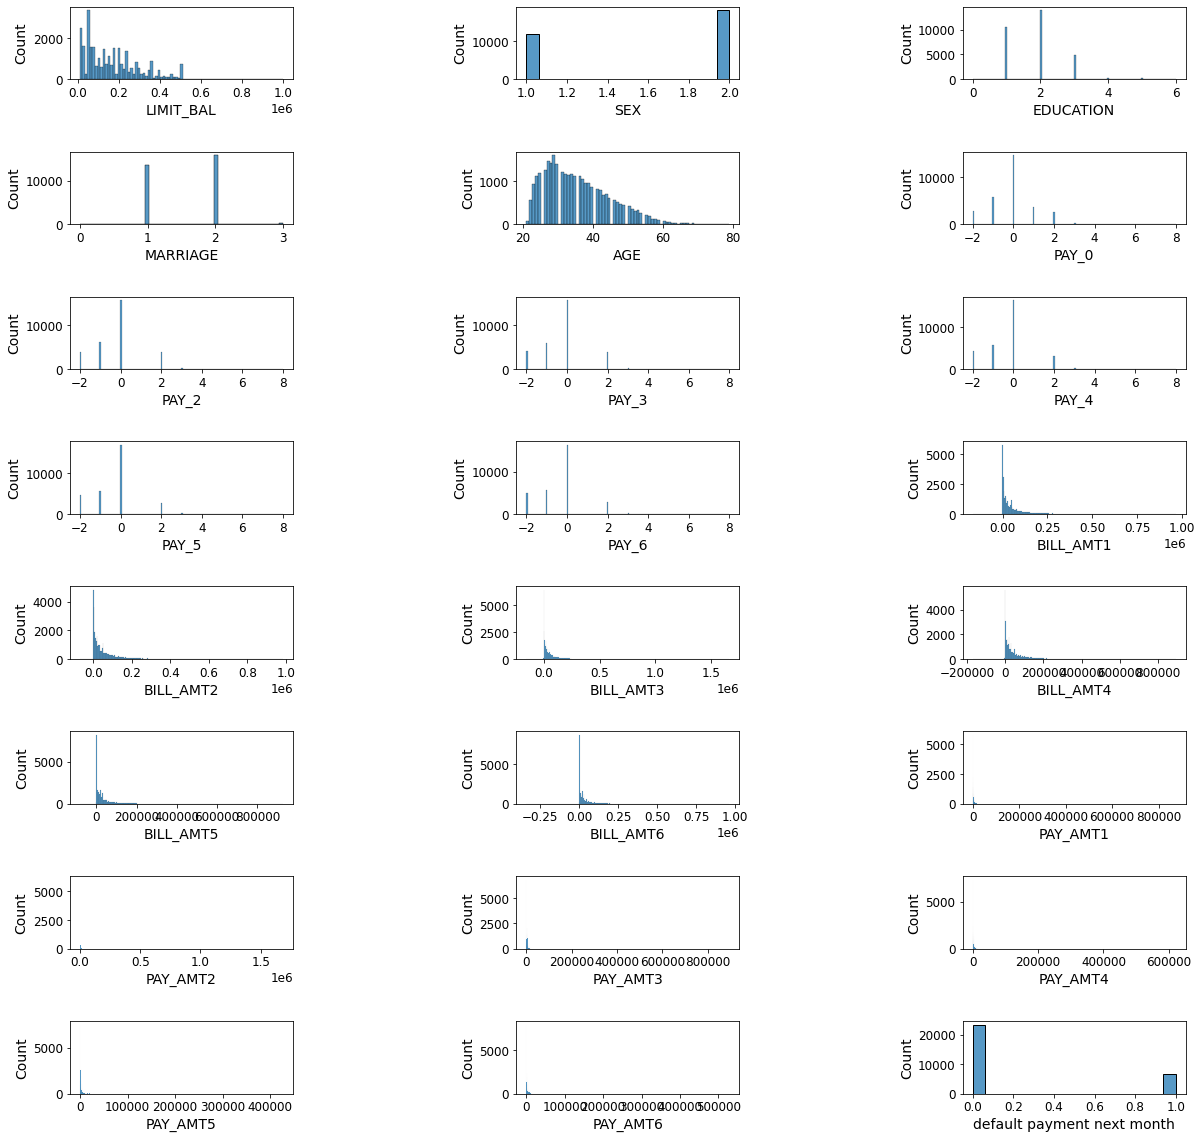

In [4]:
# Explore the data through histograms

# Create matplot figure
fig = plt.figure(figsize=(20,20))
fig.subplots_adjust(hspace=1, wspace=1) # adjust for whitespace in plot grid

# For each column in the DataFrame, plot it into the matplot grid as a histogram
for i, col in enumerate(df.columns[1:]):
  i += 1 # matplot grid restriction (does not start at 0, where enumerate does)
  ax = fig.add_subplot(8, 3, i) # adds plot to the matplot grid
  sns.histplot(df[col], ax=ax) 

plt.show()

<Figure size 1440x1440 with 0 Axes>

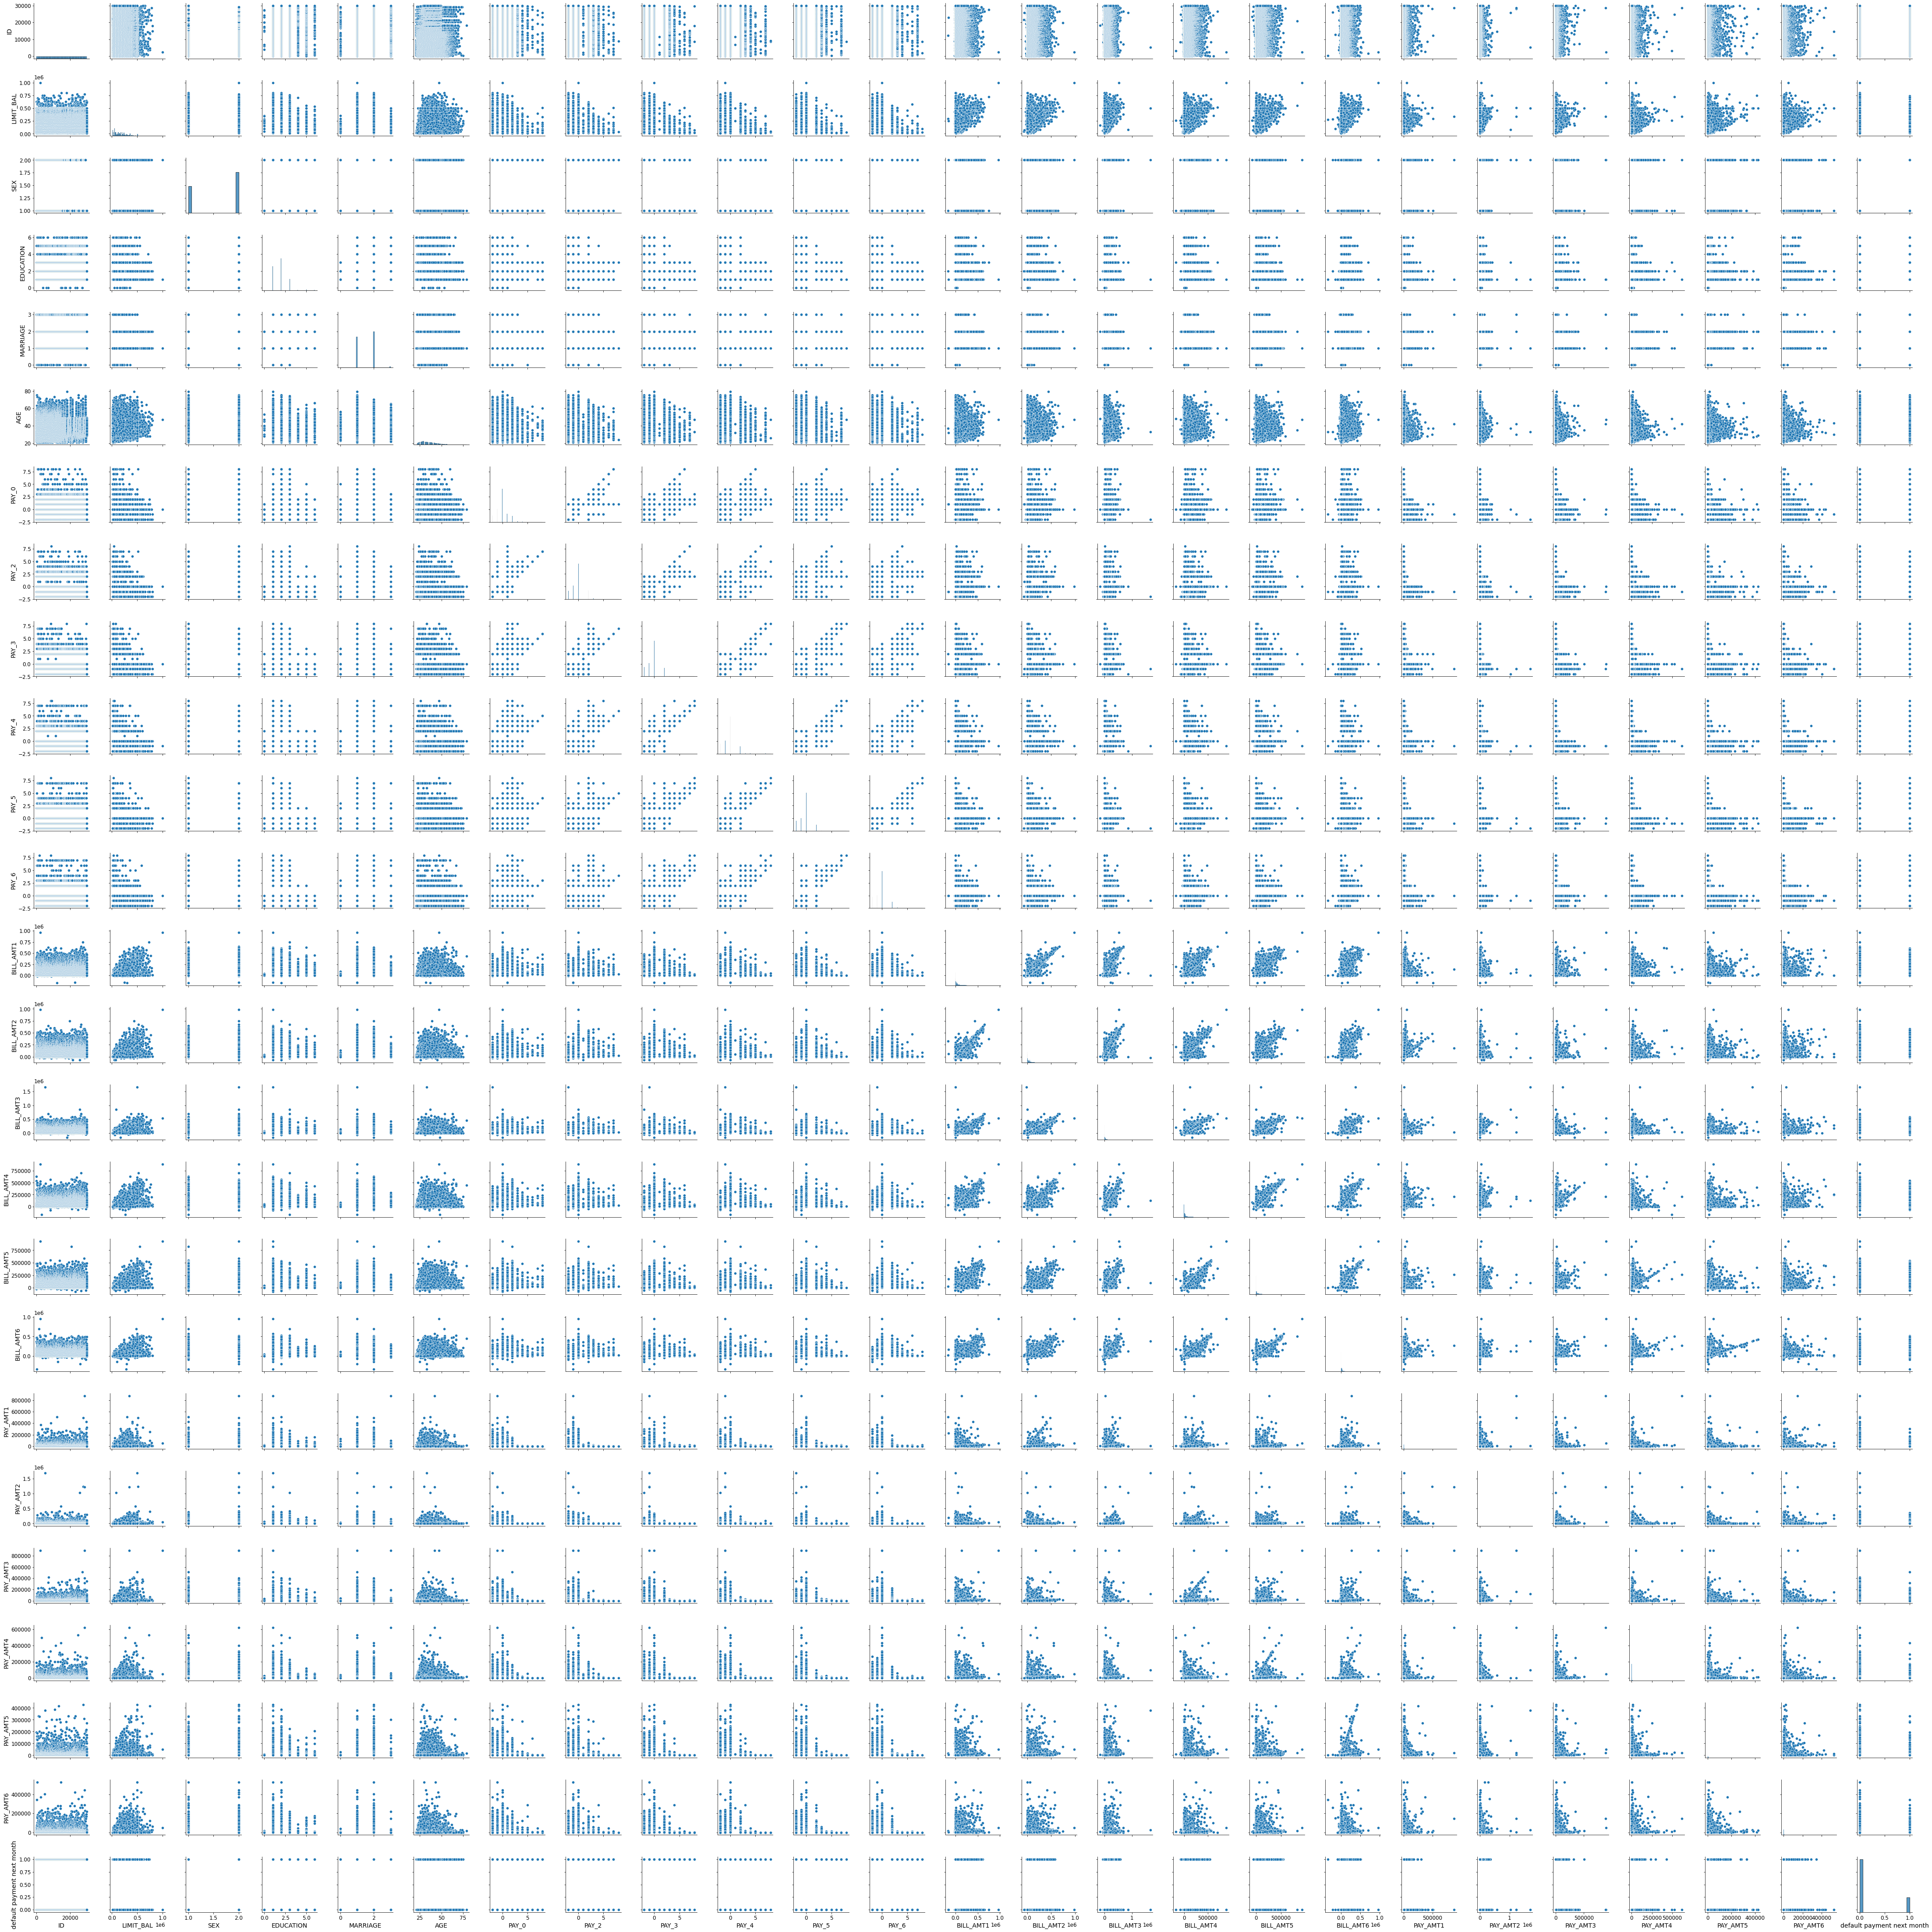

In [5]:
# Running some pairplots, specifically to see the relationship among variables

plt.figure(figsize=(20,20))
sns.pairplot(df)
plt.show()

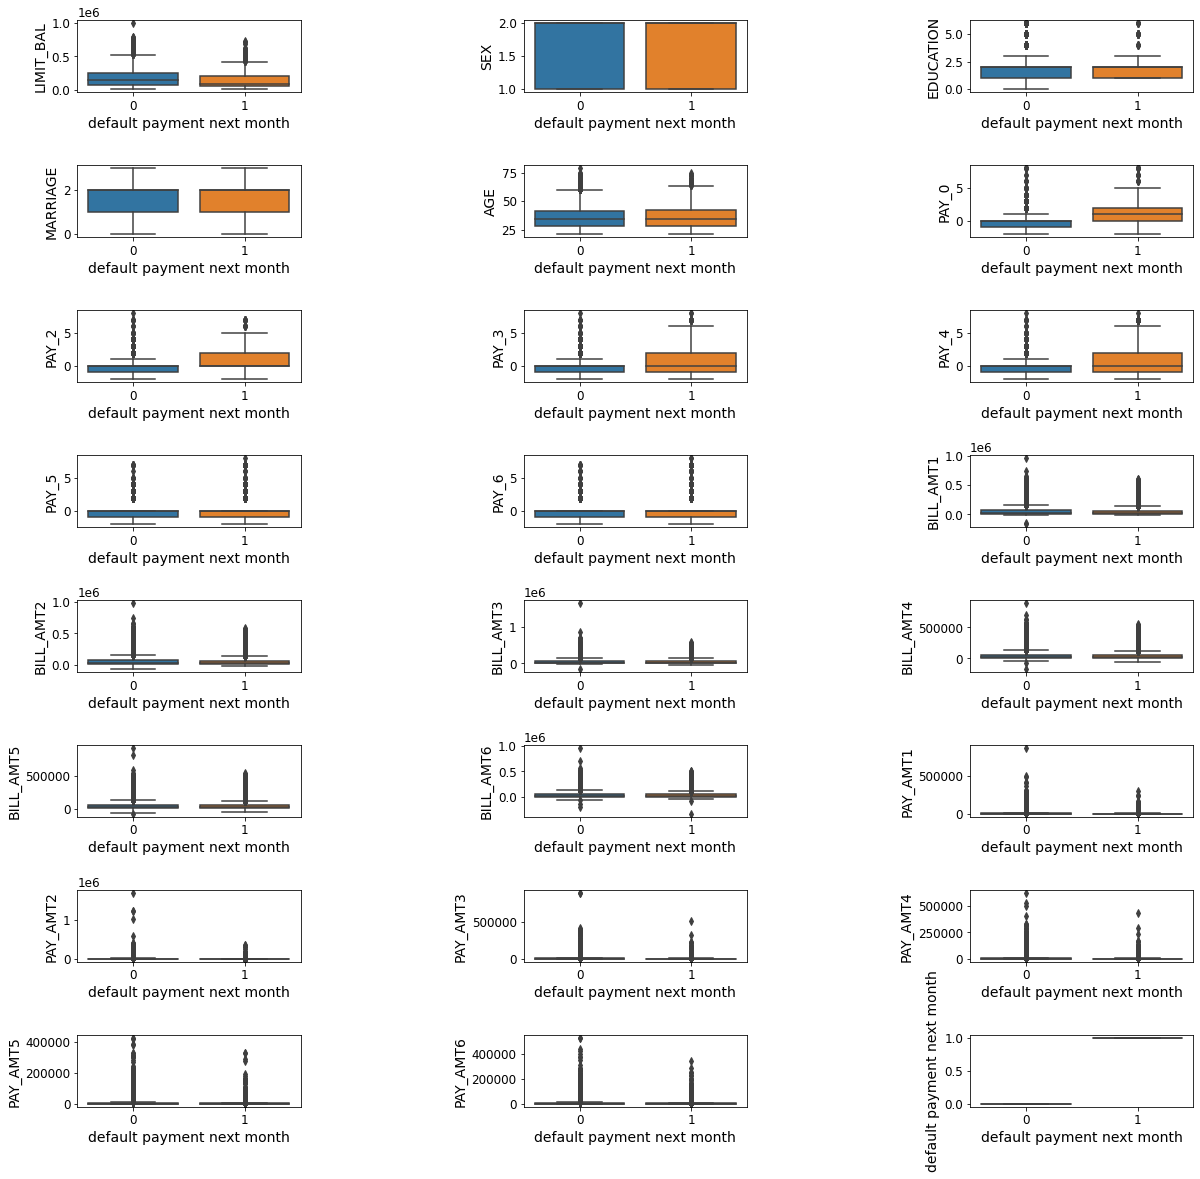

In [6]:
# Running boxplot diagrams to analyze in more detail the default payment group across variables
# as well as understand the prevelance of outliers in continuous data
fig = plt.figure(figsize=(20,20))
fig.subplots_adjust(hspace=1, wspace=1)

# For column in the DataFrame, plot the box of the variable across default groups
for i, col in enumerate(df.columns[1:]):
  i += 1
  ax = fig.add_subplot(8, 3, i)
  sns.boxplot(x=df['default payment next month'], y=df[col])

plt.show()

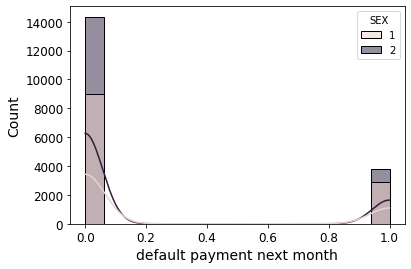

In [7]:
# Specific investigation into the gender variable as it appeared unrelated above
sns.histplot(data=df,x='default payment next month',hue='SEX', kde=True)

In [8]:
# Investigating the correlations between DataFrame series
correlations = df.corr()['default payment next month'].copy()
correlations.sort_values(inplace=True, ascending=False)
correlations

default payment next month    1.000000
PAY_0                         0.324794
PAY_2                         0.263551
PAY_3                         0.235253
PAY_4                         0.216614
PAY_5                         0.204149
PAY_6                         0.186866
EDUCATION                     0.028006
AGE                           0.013890
BILL_AMT6                    -0.005372
BILL_AMT5                    -0.006760
BILL_AMT4                    -0.010156
ID                           -0.013952
BILL_AMT3                    -0.014076
BILL_AMT2                    -0.014193
BILL_AMT1                    -0.019644
MARRIAGE                     -0.024339
SEX                          -0.039961
PAY_AMT6                     -0.053183
PAY_AMT5                     -0.055124
PAY_AMT3                     -0.056250
PAY_AMT4                     -0.056827
PAY_AMT2                     -0.058579
PAY_AMT1                     -0.072929
LIMIT_BAL                    -0.153520
Name: default payment nex

# Data Processing


In [9]:
# Leveraging the information from data exploration, there are a few features that have a low differential 
# between default next payments and not defaulting on the next payment. 
# Removing features with little apparent correlation.

# Creating a list of variables with some correlation
COLS_TO_KEEP = list(correlations[correlations > 0.02].index)[1:] # starting at 1 to avoid the dependent variable
COLS_TO_KEEP.extend(list(correlations[correlations < -0.02].index)) 
print(f"Columns being kept: {COLS_TO_KEEP}")

# Creating a copy of the dataframe with only those columns
df_features = df[COLS_TO_KEEP].copy()

# Specifying categorical variables
categorical_vars = ['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6',
                    'EDUCATION', 'MARRIAGE', 'SEX']

# Specifying continuous variables
continuous_vars = ['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5',
                   'PAY_AMT6', 'LIMIT_BAL']

# Specifying the dependent variable
dep_var = ['default payment next month']

Columns being kept: ['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'EDUCATION', 'MARRIAGE', 'SEX', 'PAY_AMT6', 'PAY_AMT5', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT2', 'PAY_AMT1', 'LIMIT_BAL']


In [10]:
# Creating a pipeline

# Categorical pipeline with one hot encoding
cat_ohe_step = ('OHE', OneHotEncoder(sparse=False, handle_unknown='ignore')) 
cat_steps = [cat_ohe_step]
cat_pipe = Pipeline(cat_steps)
cat_transformers = [('cat', cat_pipe, categorical_vars)]

# Continuous pipeline
# Considering there are many outliers in the data, our pipeline will use standard scaler, not min max
con_scl_step = ('scl', StandardScaler())
con_steps = [con_scl_step]
con_pipe = Pipeline(con_steps)
con_transformers = [('con', con_pipe, continuous_vars)]

# Transform the features depending on categorical/continuous
ct = ColumnTransformer(transformers=cat_transformers+con_transformers)
ct.fit(df_features)
X = ct.transform(df_features)

# Get the dependent variable
y = df['default payment next month'].values

# Train test split with requested 80/20 split and random seed
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(24000, 84) (6000, 84) (24000,) (6000,)


## KNN Classifier

In [11]:
# Running the K-Nearest Neighbors Classifier through Grid Search and Cross Validation

# Only parameter to tune is n_neighbors
knn_param_grid = {'n_neighbors': [3, 5, 10, 20]}

# Set up the grid search, including a cross validation of 5, and ROC AUC scoring
knn_grid_search = GridSearchCV(estimator=knnc(),
                               param_grid=knn_param_grid,
                               scoring='roc_auc',
                               cv=5)

# Fit the instantiated KNN grid search object
knn_grid_search.fit(X=X_train, y=y_train)

# Get the results of the grid search
print(knn_grid_search.best_params_)
print("\n",knn_grid_search.best_estimator_)

{'n_neighbors': 20}

 KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=20, p=2,
                     weights='uniform')


In [12]:
# Initial statistics
knn_final_model = knn_grid_search.best_estimator_
knn_scores = cross_val_score(knn_final_model, X_test, y_test, cv=5, scoring='roc_auc')
print(f"Mean: {knn_scores.mean():.4f} \nStandard Dev.: {knn_scores.std():.4f}")

Mean: 0.7349 
Standard Dev.: 0.0211


## Random Forest

In [13]:
# Running the Random Forest Classifier also through Grid Search and CV

# Only parameter to tune is n_estimators
rfc_param_grid = {'n_estimators': [4, 5, 10, 20, 50]}

# Instantiate the grid search object with cross validation 5
rfc_grid_search = GridSearchCV(estimator=rfc(),
                               param_grid=rfc_param_grid,
                               scoring='roc_auc',
                               cv=5)

# Fit the instantiated model
rfc_grid_search.fit(X=X_train, y=y_train)

# Get the results of the grid search and the best model
print(rfc_grid_search.best_params_)
print("\n",rfc_grid_search.best_estimator_)

{'n_estimators': 50}

 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)


In [14]:
# Initial statistics for Random Forest Classifier
rfc_final_model = rfc_grid_search.best_estimator_
rfc_scores = cross_val_score(rfc_final_model, X_test, y_test, cv=5, scoring='roc_auc')
print(f"Mean: {rfc_scores.mean():.4f} \nStandard Dev.: {rfc_scores.std():.4f}")

Mean: 0.7406 
Standard Dev.: 0.0227


## ROC Curve

In [15]:
# Getting the ROC Curves and plotting them

# Import the dependency from sklearn for the roc_curve function
from sklearn.metrics import roc_curve

# Run the roc_curve function off the probabilities from both classifiers
knn_fpr, knn_tpr, knn_thresholds = roc_curve(y_test, knn_final_model.predict_proba(X_test)[:, 1])
rfc_fpr, rfc_tpr, rfc_thresholds = roc_curve(y_test, rfc_final_model.predict_proba(X_test)[:, 1])

Best KNN Classifier Threshold: 0.25 Gmeans: 0.68
Best Random Forest Classifier Threshold: 0.26 Gmeans: 0.69


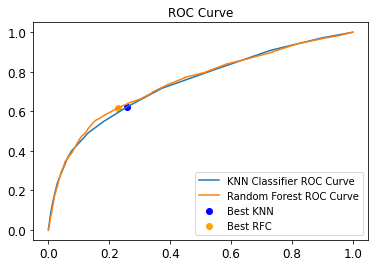

In [16]:
# Plot both ROC curves in the same graph
plt.plot(knn_fpr, knn_tpr, label="KNN Classifier ROC Curve")
plt.plot(rfc_fpr, rfc_tpr, label="Random Forest ROC Curve")
plt.title("ROC Curve")

# Determine the best threshold from both classifiers
# This uses the Geometric Mean or G-Mean, which is best used in imbalanced sets 
# to find an optimal point for both specificity and sensitivity.

knn_gmeans = np.sqrt(knn_tpr * (1-knn_fpr)) # calculation of Geometric mean
knn_i = np.argmax(knn_gmeans) # finding the Geometric mean
print(f"Best KNN Classifier Threshold: {knn_thresholds[knn_i]} Gmeans: {knn_gmeans[knn_i]:.2f}")
plt.scatter(knn_fpr[knn_i], knn_tpr[knn_i], marker='o', color='blue', label='Best KNN') # adding to plot

rfc_gmeans = np.sqrt(rfc_tpr * (1-rfc_fpr)) # calculation of Geometric mean
rfc_i = np.argmax(rfc_gmeans) # finding the Geometric mean
print(f"Best Random Forest Classifier Threshold: {rfc_thresholds[rfc_i]} Gmeans: {rfc_gmeans[rfc_i]:.2f}")
plt.scatter(rfc_fpr[rfc_i], rfc_tpr[rfc_i], marker='o', color='orange', label='Best RFC') # adding to plot

plt.legend()
plt.show()


In [17]:
# Run new list for predictions using the thresholds identified above

# Get probabilities 
knn_probabilities = knn_final_model.predict_proba(X_test)[:, 1]
rfc_probabilities = rfc_final_model.predict_proba(X_test)[:, 1]

# Test probabilities against threshold
knn_y_threshold = [1 if x > 0.25 else 0 for x in knn_probabilities]
rfc_y_threshold = [1 if x > 0.25 else 0 for x in rfc_probabilities]

KNN accuracy: 0.76
KNN balanced accuracy: 0.68
KNN precision: 0.46
KNN recall: 0.55


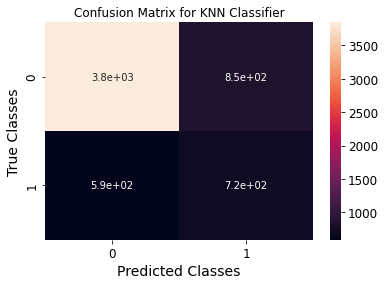

In [18]:
# K-Nearest Neighbors Results with threshold

# Print summary statistics
print(f"KNN accuracy: {accuracy_score(y_test,knn_y_threshold):.2f}")
print(f"KNN balanced accuracy: {balanced_accuracy_score(y_test,knn_y_threshold):.2f}")
print(f"KNN precision: {precision_score(y_test, knn_y_threshold):.2f}")
print(f"KNN recall: {recall_score(y_test, knn_y_threshold):.2f}")

# Plot confusion matrix
plt.title("Confusion Matrix for KNN Classifier")
sns.heatmap(confusion_matrix(y_test,knn_y_threshold), annot=True)
plt.xlabel("Predicted Classes")
plt.ylabel("True Classes")
plt.show()

RFC accuracy: 0.74
RFC balanced accuracy: 0.69
RFC precision: 0.43
RFC recall: 0.62


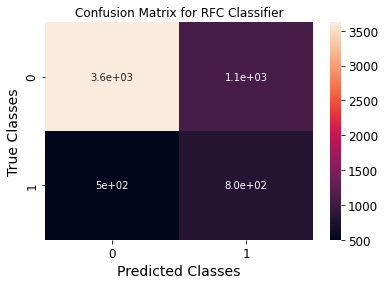

In [19]:
# Random Forest Results with threshold

# Print summary statistics
print(f"RFC accuracy: {accuracy_score(y_test,rfc_y_threshold):.2f}")
print(f"RFC balanced accuracy: {balanced_accuracy_score(y_test,rfc_y_threshold):.2f}")
print(f"RFC precision: {precision_score(y_test, rfc_y_threshold):.2f}")
print(f"RFC recall: {recall_score(y_test, rfc_y_threshold):.2f}")

# Plot confusion matrix
plt.title("Confusion Matrix for RFC Classifier")
sns.heatmap(confusion_matrix(y_test,rfc_y_threshold), annot=True)
plt.xlabel("Predicted Classes")
plt.ylabel("True Classes")
plt.show()

# Conclusions

Explain your results and choices

**Answer:**

As shown in the above analysis, both models perform similarly in terms of test accuracy. While the KNN model does have slightly higher accuracy when not accounting for the class imbalance on default vs non-default cases, the Random Forest model provides a stronger recall metric.

Under the assumption that the user of the model is aiming to reduce default payments, and the model would be used to identify records for default avoidance tactics (i.e. reminder calls, adjusted products, etc.) then I would recommend the Random Forest Classifier model for use. It will provide a greater benefit as it has a higher recall score and generally a higher balanced accuracy when accounting for class imbalance.

**Recommendation: Random Forest Classifier**